In [1]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
from lib import driver
from lib import dataset
import netCDF4 as nc
import matplotlib.pyplot as plt
from lib.tools import *
from cartopy import crs as ccrs

In [2]:
expt_name = 'realtime'
LIMdriver = driver.Driver(f'namelist_{expt_name}.py')
LIMdriver.get_variables()
LIMdriver.get_eofs()

reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_H500.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_colIrr.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SOIL.p
reading colIrr for LIM 1
reading H500 for LIM 1
reading SLP for LIM 1
reading T2m for LIM 1
reading SOIL for LIM 1
reading SF750 for LIM 1
reading SF100 for LIM 1
reading SST for LIM 1
reading CPCtemp for LIM 1
reading colIrr for LIM 2
reading H500 for LIM 2
reading SLP for LIM 2
reading T2m for LIM 2
reading SOIL for LIM 2
reading SF750 for LIM 2
reading SF100 for LIM 2
reading SST for LIM 2
reading CPCtemp for LIM 2
reading colIrr for LIM 3
reading H500 for LIM 3
reading SLP for LIM 3
reading T2m for LIM

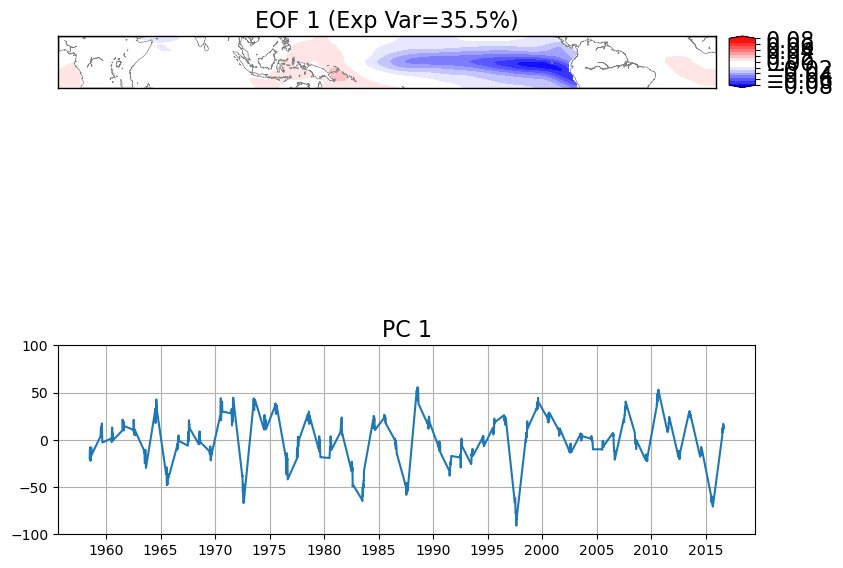

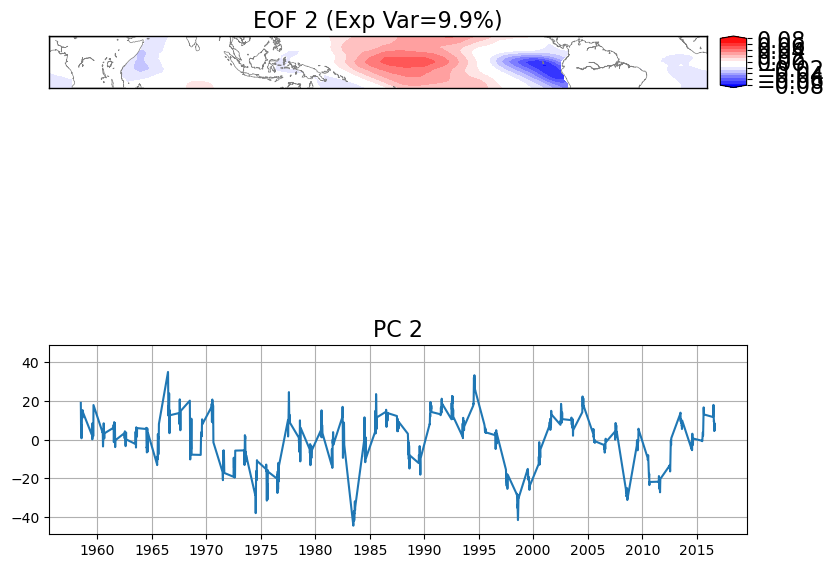

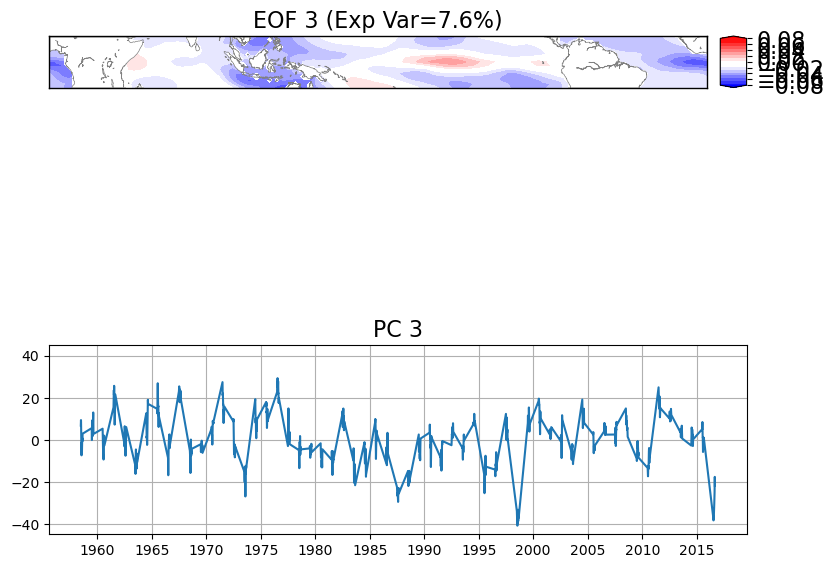

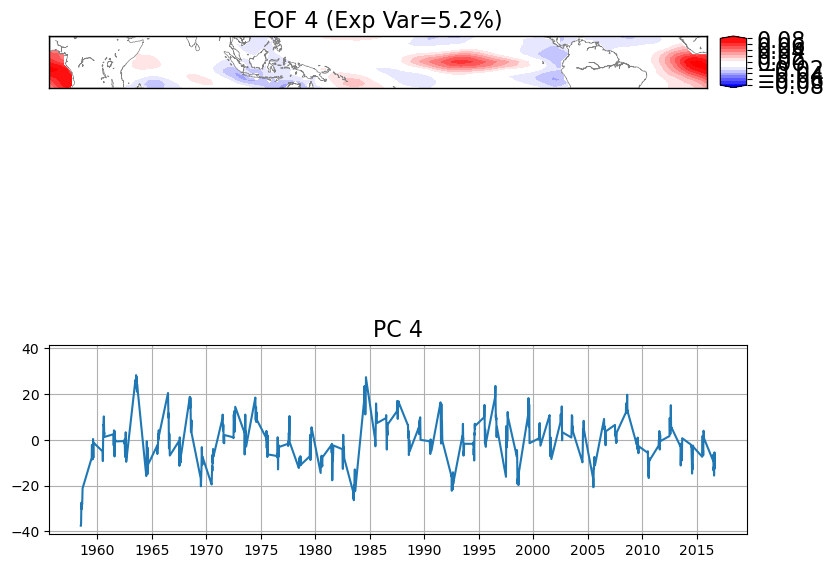

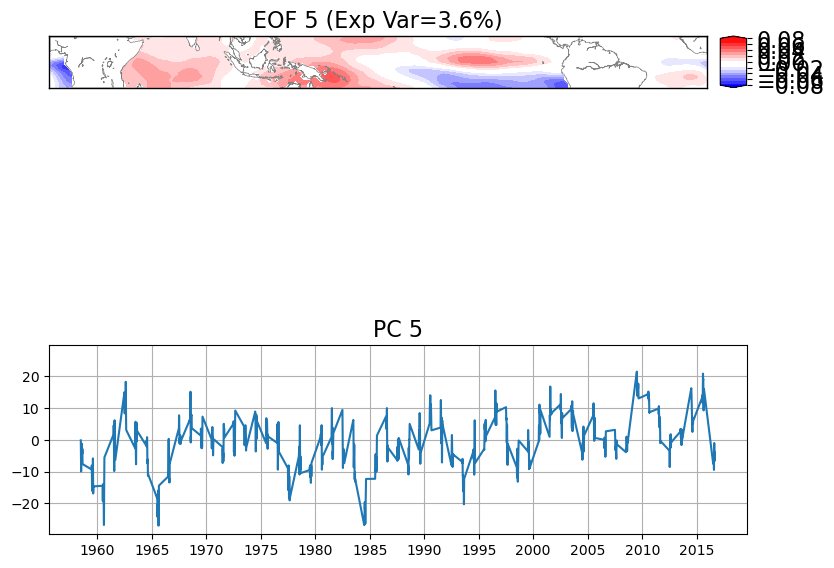

In [3]:
varname = 'SST'
obj = LIMdriver.use_vars[varname]['data']
obj.domain
obj.mapgrid.shape
eofobj = LIMdriver.eofobjs[7][varname]
eofobj.plot()

In [4]:

zmap = [obj.regrid(daily) for daily in obj.running_mean]

In [ ]:
ds = xr.Dataset(
    {varname: (("time", "lat", "lon"), zmap)},
    coords={"time": obj.time, "lat": obj.latgrid[:,0],"lon": obj.longrid[0,:]},
    attrs={"description": varname},
)

In [ ]:
dsclimo = xr.open_dataset(f'./data_clim/{varname}/{varname}.2023.nc')          
climo_RT = np.array(dsclimo['climo'][:])
climo_RT = np.array([LIMdriver.use_vars[varname]['data'].flatten(i) for i in climo_RT])
climo_RT


In [ ]:
ds = xr.open_dataset(f'./data_clim/2p0.1981-2010_{varname}.nc')
climo_new = np.array(ds[varname][:])
climo_new
diff = climo_RT-climo_new

In [ ]:
SSTmap = np.array([obj.regrid(daily) for daily in diff])

In [ ]:
dsSST = xr.Dataset(
    {varname: (("doy", "lat", "lon"), SSTmap)},
    coords={"time": np.arange(365), "lat": obj.latgrid[:,0],"lon": obj.longrid[0,:]},
    attrs={"description": "climo"},
)

In [ ]:
fig, ax = plt.subplots()
contour_levels = np.arange(-5,5.05,0.05)
lat_bounds = [-15, 15]  # Replace with your desired latitude boundaries
lon_bounds = [0, 360]   # Replace with your desired longitude boundaries

dsSST[varname].plot(ax=ax)
# mean(axis=0).plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
# ax.set_xlim([lon_bounds[0], lon_bounds[1]])
# ax.set_ylim([lat_bounds[0], lat_bounds[1]])

In [ ]:
dsAll = xr.open_dataset(f'./data_realtime/{varname.lower()}All.nc')
ax = dsAll['btmp'][0].plot(levels = np.linspace(290,310,11))
# ax.set_xlim([lon_bounds[0], lon_bounds[1]])
# ax.set_ylim([lat_bounds[0], lat_bounds[1]])
# plt.show()
dsAll

In [141]:
dsF = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_realtime/20230911/no_offset/SST/SST.20230911.nc')
dsF

<xarray.Dataset>
Dimensions:     (time: 1, lead_time: 33, lon: 180, lat: 91)
Coordinates:
  * time        (time) datetime64[ns] 2023-09-11
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 31 days 32 days
  * lon         (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat         (lat) float64 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
Data variables:
    SST_anom    (lead_time, lat, lon) float32 ...
    SST_spread  (lead_time, lat, lon) float32 ...
    SST_prob    (lead_time, lat, lon) float32 ...

[ 99.99996 100.      100.      ... 100.      100.      100.     ]


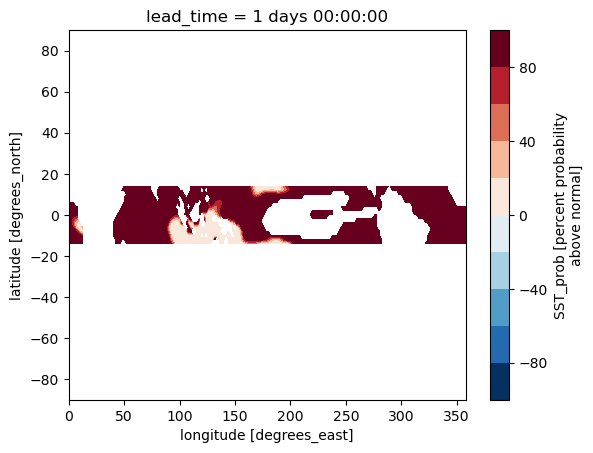

In [162]:
contour_levels = np.arange(-100,120,20)
dsF['SST_prob'][1].plot.contourf(levels=contour_levels)
data = dsF['SST_prob'][1].values
print(data[np.where(~np.isnan(data))])

In [130]:
lon=obj.longrid
lat=obj.latgrid
zmap = lon
print(zmap.shape)

lat1D = lat[:,0]
lon1D = lon[0,:]
latMax = max(obj.latbounds)
latMin = min(obj.latbounds)
lonMax = max(obj.lonbounds)
lonMin = min(obj.lonbounds)
masklat = np.where((lat1D >= latMin) & (lat1D <= latMax))
masklon = np.where((lon1D >= lonMin) & (lon1D <= lonMax))

           
zmap = zmap[masklat[0],:]
print(zmap.shape)

zmap = zmap[:,masklon[0]]
print(zmap.shape)
lon, lat = np.meshgrid(lon1D[masklon],lat1D[masklat])
# print(lon.shape)




(91, 180)
(15, 180)
(15, 180)


In [69]:
zmap = obj.longrid
zmap = zmap[(np.where(lat[:,0] >= min(obj.latbounds))) & (np.where(lon[:,0]<=max(obj.latbounds)))[0],:][0]
print(zmap.shape)
zmap = zmap[:,(np.where(lon[0,:]>= min(obj.lonbounds)))&(np.where(lon[0,:]<=max(obj.lonbounds)))[0]    ][:,0,:]
# zmap = zmap[:,(np.where(lon[0,:] >= min(obj.lonbounds))) & (np.where(lon[0,:]<=max(obj.lonbounds)))[0]]
print(zmap.shape)
# print(np.asarray(index).shape)
# print(obj.lonbounds)
# print(obj.lat)
# print(obj.lat.shape)

(14, 180)
(14, 180)
